Kaggle competition : https://www.kaggle.com/competitions/titanic/overview

In [ ]:
# Import libraies, Mount Drive, Load Dataset
import pandas as pd
from io import StringIO
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn import set_config
set_config(display='diagram')
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report,plot_confusion_matrix, confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#path='/content/drive/MyDrive/Colab Notebooks/Machine Learning/Kaggle/train.csv'


#df = pd.read_csv(StringIO(path), sep=",")
#print(df)

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning/Kaggle/train.csv',index_col = 0)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#Make a copy of the original df
df_t = df.copy()
df_t.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_t.reset_index(inplace=True)

In [ ]:
df_t

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
#Check for duplicates
df_t.duplicated().sum()

0

In [ ]:
#check for nulls
df_t.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Check for and address any inconsistent values in categorical columns.

In [ ]:
dtypes = df_t.dtypes
str_Columns = dtypes[dtypes=='object'].index
str_Columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [ ]:
for col in str_Columns:
    print(f"Column_Name - {col}")
    print(df_t[col].value_counts(dropna=False))
    print('\n')

Column_Name - Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64


Column_Name - Sex
male      577
female    314
Name: Sex, dtype: int64


Column_Name - Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64


Column_Name - Cabin
NaN            687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34         

In [ ]:
#Delete the unnecessary column 7,8,9
df_t = df_t.drop(columns=['Name', 'Ticket', 'Cabin','Embarked','PassengerId'], axis=1)
df_t.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [ ]:
#Find the Class Names and Determine How Balanced the Classes Are
df_t['Survived'].value_counts(normalize = True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [ ]:
#check for nulls
df_t.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [ ]:
## Arrange Data into a Features Matrix and Target Vector
y = df_t['Survived']
X = df_t.drop(columns = 'Survived')
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


Imputing missing values after the train test split using SimpleImputer.

In [ ]:
#instantiate the StandardScaler, OneHotEncoder, OrdinalEncoder and Imputers
scaler = StandardScaler()
ohe = OneHotEncoder(sparse=False,handle_unknown='ignore')

mean_imputer = SimpleImputer(strategy='mean')


In [ ]:
# Setup the pipelines for the numeric and categorical data

num_pipeline = make_pipeline(mean_imputer, scaler)
nom_pipeline = make_pipeline(ohe)

In [ ]:
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include = 'object')

# Setup the tuples to pair the processors with the make column selectors

numeric_tuple = (num_pipeline, num_selector)
nominal_tuple = (nom_pipeline, cat_selector)

In [ ]:
#Create a preprocessing object to prepare the dataset for Machine Learning
# Instantiate the make column transformer

preprocessor = make_column_transformer(numeric_tuple, nominal_tuple, remainder='drop')

In [ ]:
# Fit the column transformer on the X_train

preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fcbcf6f50d0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fcbcf6f5090>)])

Logistic Regression Model

In [ ]:
# Make an instance of the model
logreg = LogisticRegression()

# Create pipeline
logreg_pipe = make_pipeline(preprocessor, logreg)

# Training the model on the data by fitting, storing the information learned from the data
# Model is learning the relationship between X and y 
logreg_pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fcbcf6f50d0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fcbcf6f5090>)])),
                ('logisticregression', LogisticRegression())])

In [ ]:
#save predictions
train_preds = logreg_pipe.predict(X_train)
test_preds = logreg_pipe.predict(X_test)

In [ ]:
# Check the scores (accuracy)
print(logreg_pipe.score(X_train, y_train))
print(logreg_pipe.score(X_test, y_test))

0.8008982035928144
0.8071748878923767


In [ ]:
print('Classification Report for LogisticRegression Test Set')

LR_test_report = classification_report(y_test, test_preds)
print(LR_test_report)

Classification Report for LogisticRegression Test Set
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       134
           1       0.78      0.72      0.75        89

    accuracy                           0.81       223
   macro avg       0.80      0.79      0.80       223
weighted avg       0.81      0.81      0.81       223



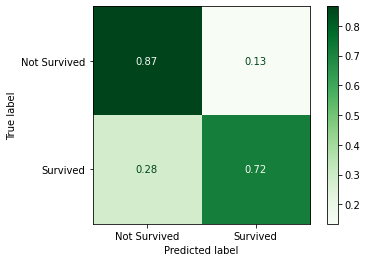

In [ ]:
# create a confusion matrix with the test data
labels = ['Not Survived','Survived']
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, test_preds, display_labels=labels,
               normalize='true',  cmap='Greens');

In [ ]:
logreg_pipe.get_params()

In [ ]:
grid={"logisticregression__C":[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000], "logisticregression__penalty":["l1","l2"]}# l1 lasso l2 ridge
model_pipe = make_pipeline(preprocessor, LogisticRegression())
logreg_cv=GridSearchCV(estimator=model_pipe,
                     param_grid = grid,
                     scoring='accuracy',
                     cv=10,
                     refit=True,
                     n_jobs=1)
logreg_cv.fit(X_train,y_train)
#save predictions
train_preds_lg = logreg_cv.predict(X_train)
test_preds_lg = logreg_cv.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
80 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  Fi

In [ ]:
print(logreg_cv.best_score_)

0.7980099502487563


In [ ]:
print(logreg_cv.best_params_)

{'logisticregression__C': 0.1, 'logisticregression__penalty': 'l2'}


In [ ]:
#Print the test score of the best model

clfLR = logreg_cv.best_estimator_
print('Test accuracy: %.3f' % clfLR.score(X_test, y_test))

Test accuracy: 0.807


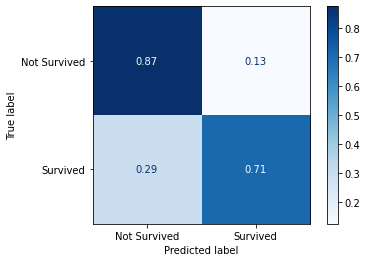

In [ ]:
# Plot the confusion matrix

ConfusionMatrixDisplay.from_predictions(y_test, test_preds_lg,
                                        display_labels=labels,
                                        cmap='Blues',
                                        normalize='true');

Random Forest Classifier

In [ ]:
## Make, fit, and evalaute Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)
# put the model in a pipeline with the preprocessor
rf_clf_pipe = make_pipeline(preprocessor, rf_clf)
rf_clf_pipe.fit(X_train, y_train)
# evaluate the model on both the training and the testing data.

#save predictions
train_preds = rf_clf_pipe.predict(X_train)
test_preds = rf_clf_pipe.predict(X_test)

print(rf_clf_pipe.score(X_train, y_train))
print(rf_clf_pipe.score(X_test, y_test))

0.9820359281437125
0.7892376681614349


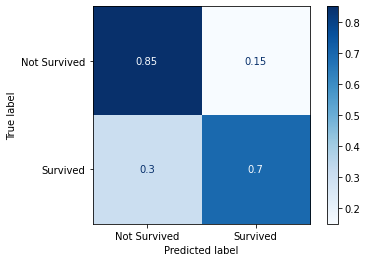

In [ ]:
# Plot the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, test_preds,
                                        display_labels=labels,
                                        cmap='Blues',
                                        normalize='true');

Hyperparameter Tuning With For Loops

In [ ]:
rf_clf_pipe.get_params()

In [ ]:
#from sklearn.model_selection import RandomizedSearchCV
model_pipe = make_pipeline(preprocessor, RandomForestClassifier())

param_grid = {'randomforestclassifier__max_depth': [3, 5, 10],
              'randomforestclassifier__min_samples_leaf': [3,15,20],
              'randomforestclassifier__min_samples_split': [2, 10, 100]}

              

In [ ]:
rf_random = GridSearchCV(estimator=model_pipe, param_grid=param_grid, cv= 5)

In [ ]:
rf_random.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7fcbcf6f50d0>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7fcbcf6f5090>)])),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             param_grid={'randomforestclassifier__max_depth': [3, 5, 10],
                         'randomforestclassifier__min_samples_leaf': [3, 15,
                                                                      20],
                         'randomforestclassifier__min_samples_split': [2, 10,
                                                                       100]})

In [ ]:
# another method similar to GridSearchCV
#from sklearn.model_selection import RandomizedSearchCV
#model_pipe = make_pipeline(preprocessor, RandomForestClassifier())
 
#random_grid = {'randomforestclassifier__max_depth': [3, 5, 10], 'randomforestclassifier__min_samples_leaf': [3,15,20], 'randomforestclassifier__min_samples_split': [2, 10, 100]}

In [ ]:
#rf_random = RandomizedSearchCV(estimator = model_pipe, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)


In [ ]:
rf_random.best_params_

{'randomforestclassifier__max_depth': 5,
 'randomforestclassifier__min_samples_leaf': 3,
 'randomforestclassifier__min_samples_split': 10}

In [ ]:
#Retrieve the Best Model, Refit, and Evaluate

best_model = rf_random.best_estimator_
 
#refit the model on the whole training set
best_model.fit(X_train, y_train)

#save predictions
test_preds1 = best_model.predict(X_test)

#score the model on the test set
best_model.score(X_test, y_test)

0.8161434977578476

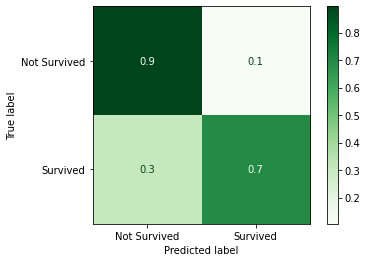

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, test_preds1, display_labels=labels,
               normalize='true',  cmap='Greens');


               

*****This above is the best model so far*****

In [ ]:
param_grid1 = {'randomforestclassifier__max_depth': [2,3,4,5,10,15, 20, None],
              'randomforestclassifier__min_samples_leaf': [1, 2, 3, 4,5],
              'randomforestclassifier__min_samples_split': [1,2,3,4, 5],
              'randomforestclassifier__n_estimators': [10,50,100]}


#'randomforestclassifier__bootstrap': [True, False]


In [ ]:
rf_random1 = GridSearchCV(estimator=model_pipe, param_grid=param_grid1, cv= 5)

In [ ]:
rf_random1.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
600 fits failed out of a total of 3000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
600 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-pa

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7fcbcf6f50d0>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_u...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7fcbcf6f5090>)])),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             param_grid={'randomforestclassifier__max_depth': [2, 3, 4, 5, 10,
                                                               15, 20, None],
                         'randomforestclassifier__min_samples_leaf': [1, 2, 3,
                                                                      4, 5],
                         'randomforestclassifier__min_samples_split': [1, 2, 3,
                                                                       4, 5],
                         'randomforestclassifier__n_estimators': [10, 50, 100]})

In [ ]:
rf_random1.best_params_

{'randomforestclassifier__max_depth': 20,
 'randomforestclassifier__min_samples_leaf': 2,
 'randomforestclassifier__min_samples_split': 2,
 'randomforestclassifier__n_estimators': 100}

In [ ]:
#Retrieve the Best Model, Refit, and Evaluate

best_model2 = rf_random1.best_estimator_
 
#refit the model on the whole training set
best_model2.fit(X_train, y_train)

#save predictions
test_preds2 = best_model2.predict(X_test)

#score the model on the test set
best_model2.score(X_test, y_test)

0.8251121076233184

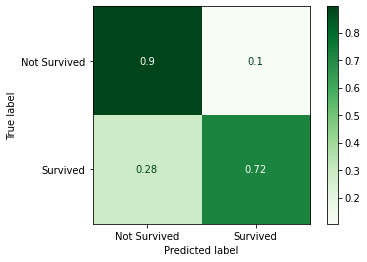

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, test_preds2, display_labels=labels,
               normalize='true',  cmap='Greens');

Adaboost

In [ ]:
def make_confmat(y_true, y_pred, labels=None, savepath=None, cmap='Greens',
                 normalize=None):
  """
  Takes a vector of true labels and a vector of predicted labels.
  
  Optional Arguments:
  labels: labels for X and Y ticks, default None
  savepath: a path to save the plot to, default None
  cmap: a color map, default 'Greens'
  normalize: whether to normalize the annotated values in the boxes
    Options: ['true', 'pred', 'all'].  Default None
  returns a confusion matrix figure.
  """
  conf_mat = confusion_matrix(y_true, y_pred, normalize=normalize)
  figure = sns.heatmap(conf_mat, xticklabels=labels, yticklabels=labels, 
                       annot=True, cmap=cmap)
  if savepath:
    plt.savefig(savepath)
  return figure

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       134
           1       0.76      0.73      0.74        89

    accuracy                           0.80       223
   macro avg       0.79      0.79      0.79       223
weighted avg       0.80      0.80      0.80       223



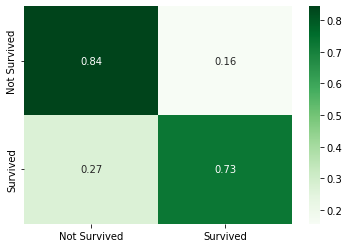

In [ ]:
ada_pipe = make_pipeline(preprocessor, AdaBoostClassifier())
ada_pipe.fit(X_train, y_train)
y_hat1 = ada_pipe.predict(X_test)

print(classification_report(y_test, y_hat1))
conf_mat = make_confmat(y_test, y_hat1, labels=labels, normalize = 'true', 
                        savepath='xgboost_conf_mat.png')
conf_mat

Light GBM

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       134
           1       0.79      0.73      0.76        89

    accuracy                           0.82       223
   macro avg       0.81      0.80      0.81       223
weighted avg       0.81      0.82      0.81       223



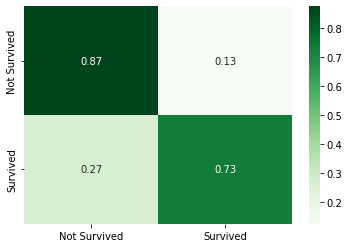

In [ ]:
lgb_pipe = make_pipeline(preprocessor, LGBMClassifier())
lgb_pipe.fit(X_train, y_train)
y_hat2 = lgb_pipe.predict(X_test)

print(classification_report(y_test, y_hat2))
conf_mat = make_confmat(y_test, y_hat2, labels=labels, normalize = 'true', 
                        savepath='xgboost_conf_mat.png')
conf_mat

XGBoost

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       134
           1       0.83      0.66      0.74        89

    accuracy                           0.81       223
   macro avg       0.82      0.79      0.80       223
weighted avg       0.81      0.81      0.81       223



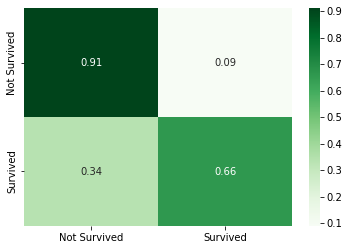

In [ ]:
xgb_pipe = make_pipeline(preprocessor, XGBClassifier())
xgb_pipe.fit(X_train, y_train)
#test_data = pd.read-csv
y_hat3 = xgb_pipe.predict(X_test)

print(classification_report(y_test, y_hat3))
conf_mat = make_confmat(y_test, y_hat3, labels=labels, normalize = 'true', 
                        savepath='xgboost_conf_mat.png')
conf_mat

In [ ]:
#score the model on the test set
xgb_pipe.score(X_test, y_test)

0.8116591928251121

Now work on Test data

In [ ]:
df_test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning/Kaggle/test.csv',index_col = 0)
df_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df_test.reset_index(inplace=True)
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
#Check for duplicates
df_test.duplicated().sum()

0

In [ ]:
test_features = df_test[X_train.columns]
test_features.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,34.5,0,0,7.8292
1,3,female,47.0,1,0,7.0000
2,2,male,62.0,0,0,9.6875
3,3,male,27.0,0,0,8.6625
4,3,female,22.0,1,1,12.2875


In [ ]:
#check for nulls
test_features.isna().sum()

Pclass     0
Sex        0
Age       86
SibSp      0
Parch      0
Fare       1
dtype: int64

In [ ]:
age_mean = test_features['Age'].mean()
test_features['Age'].fillna(age_mean, inplace=True)
test_features.isna().sum()


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      1
dtype: int64

In [ ]:
fare_mean = test_features['Fare'].mean()
test_features['Fare'].fillna(fare_mean, inplace=True)
test_features.isna().sum()


Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

In [ ]:
preds = best_model.predict(test_features)
preds[:5]

array([0, 0, 0, 0, 1])

In [ ]:
submission_df= df_test[['PassengerId']]

submission_df['Survived'] = preds
submission_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
submission_df.columns = ['PassengerId','Survived']
submission_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
submission_df.set_index('PassengerId',inplace=True)
submission_df.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1


In [ ]:
#Submit to Kaggle
submission_df.to_csv('/content/drive//MyDrive/Colab Notebooks/Machine Learning/Kaggle/submission_2.csv')